# Entregable 3 (scikit-learn)
Ampliación de inteligencia artificial - 3º Curso  
Ingeniería Informática - Tecnologías Informáticas  
Universidad de Sevilla  

Entregable realizado por **Juan Arteaga Carmona**

In [1]:
# Imports necesarios
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Importación y normalización de los datos

Inicialmente importamos el dataset y lo dividimos en las partes que nos interesan. Nos quedaremos con los datos y la clase de cada uno asi como con el nombre de las clases.

In [2]:
datoscancer = load_breast_cancer() # Importación del dataset

X = datoscancer.data # Datos
y = datoscancer.target # Clasificacion

y_names = datoscancer.target_names # Nombres de la clasificacion (0=maligno, 1=benigno)

print(np.shape(X))
print(np.shape(y))
print(y_names)

(569, 30)
(569,)
['malignant' 'benign']


A continuación creamos el conjunto de entrenamiento y testeo a partir de los datos. Esta operación la realizamos con la funcion `train_test_split`. Le añadimos como parámetro una semilla (42) para que sea posible recrear los resultados obtenidos.
Además creamos un normalizador con `StandardScaler` y normalizamos los datos de nuestro dataset.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [4]:
normalizador = StandardScaler().fit(X_train)
Xnormalized_train = normalizador.transform(X_train)
Xnormalized_test = normalizador.transform(X_test)

# Aplicación de clasificadores sobre los datos
## Knn
Creamos un clasificador Knn con n=2 y lo entrenamos contra nuestros datos normalizados.

In [5]:
knn=KNeighborsClassifier(n_neighbors=2)

In [6]:
knn.fit(Xnormalized_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Comprobamos el score que se obtiene con este entrenamiento

In [7]:
knn.score(Xnormalized_train,y_train)

0.9859154929577465

Ademas, podemos ver y comparar la predicción del modelo frente a los datos reales:

In [54]:
print("Predicción:")
predicciones = knn.predict(Xnormalized_test)
print(predicciones)

print("\nDatos reales:")
print(y_test)

Predicción:
[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]

Datos reales:
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


De esta forma si obtenemos el score del modelo contra los datos de prueba obtenemos:

In [55]:
knn.score(Xnormalized_test,y_test)

0.951048951048951

Y como podemos observar, el 95% de las predicciones son correctas.

Con un simple script podemos consultar el número de vecinos con el que obtenemos el mejor score para nuestro conjunto de prueba.

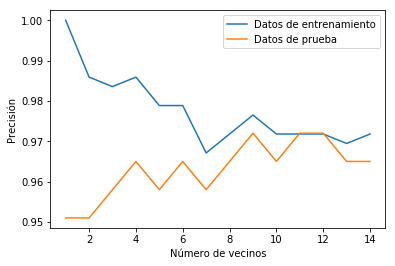

In [56]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xnormalized_train, y_train)

    training_accuracy.append(clf.score(Xnormalized_train, y_train))
    test_accuracy.append(clf.score(Xnormalized_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="Datos de entrenamiento")
plt.plot(neighbors_settings, test_accuracy, label="Datos de prueba")
plt.ylabel("Precisión")
plt.xlabel("Número de vecinos")
plt.legend()

Como se puede observar, el mejor ajuste se dará a partir de 8 vecinos.

Ademas, podemos aplicar `GridSearch` para asegurarnos de que esto es así.

In [58]:
param_grid = {'n_neighbors': [x for x in range(2,15)]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                          return_train_score=True) 
grid_search.fit(Xnormalized_train, y_train)
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}\n".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.96
Mejor clasificador encontrado: {} KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
Evaluación sobre el conjunto de test: 0.97



Al aplicar `GridSearch` hemos obtenido el clasificador que nos da mas precisión, el clasificador con n_neighboors=8 es el mejor.

Y tambien podemos calcular la matriz de confusión de este clasificador para ver los resultados de una forma más grafica.

In [59]:
kclas = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
kclas.fit(Xnormalized_train, y_train)
prediccion = kclas.predict(Xnormalized_test)

print(confusion_matrix(y_test,predicciones))
print(classification_report(y_test,predicciones,target_names=y_names))

[[51  3]
 [ 4 85]]
              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Podemos ver como TN=51, FP=3, FN=4 y TP=85 y el f1-score nos da 95%

## Regresión lineal
Creamos un modelo de regresión lineal con el metodo `LinearRegression()`. LinearRegression llevará a cabo el método de mínimos cuadrados.

In [60]:
lr = LinearRegression().fit(Xnormalized_train, y_train)

In [61]:
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lr.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lr.score(Xnormalized_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.78
Rendimiento sobre el conjunto de test: 0.73


A los modelos de regresión lineal podemos aplicarles regularización. En este caso vamos a aplicarle regularizacion L2, o Ridge y como podemos ver, a medida que cambiamos el valor de alpha obtenemos distintos resultados.

In [62]:
ridge = Ridge(alpha=1).fit(Xnormalized_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(ridge.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(ridge.score(Xnormalized_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.77
Rendimiento sobre el conjunto de test: 0.74


In [16]:
ridge = Ridge(alpha=0.1).fit(Xnormalized_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(ridge.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(ridge.score(Xnormalized_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.77
Rendimiento sobre el conjunto de test: 0.73


Asi pues, podemos generar un pequeño script que compruebe con que valores obtenemos mejor precisión:

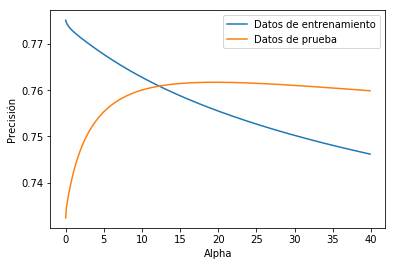

In [81]:
training_accuracy = []
test_accuracy = []

alpha_settings = np.arange(0,40,0.1)#[0,1,2...49,50]
for alphaParam in alpha_settings:
    ridge = Ridge(alpha=alphaParam).fit(Xnormalized_train, y_train)
    a = ridge.score(Xnormalized_train, y_train)
    b = ridge.score(Xnormalized_test, y_test)
    
    training_accuracy.append(a)
    test_accuracy.append(b)

plt.plot(alpha_settings, training_accuracy, label="Datos de entrenamiento")
plt.plot(alpha_settings, test_accuracy, label="Datos de prueba")
plt.ylabel("Precisión")
plt.xlabel("Alpha")
plt.legend()

Como podemos observar, el valor maximo de la precisión sobre el conjunto de datos de prueba se obtiene aproximadamente sobre un valor de alpha de 19.  
Para confirmarlo podemos utilizar `GridSearch`

In [84]:
param_grid = {'alpha': [i for i in  np.arange(0,20,0.1)]}
grid_search = GridSearchCV(Ridge(), param_grid,
                          return_train_score=True) 
grid_search.fit(Xnormalized_test, y_test)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.72
Mejor clasificador encontrado: Ridge(alpha=19.900000000000002, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Evaluación sobre el conjunto de test: 0.79


<br>

Tambien podemos aplicar regularización L1 con el metodo `Lasso()`

In [85]:
lasso = Lasso(alpha=0.001).fit(Xnormalized_train, y_train)
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lasso.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lasso.score(Xnormalized_test, y_test)))
print("Número de coeficientes (pesos) no nulos: {}".format(np.sum(lasso.coef_ != 0)))

Rendimiento sobre el conjunto de entrenamiento: 0.77
Rendimiento sobre el conjunto de test: 0.76
Número de coeficientes (pesos) no nulos: 21


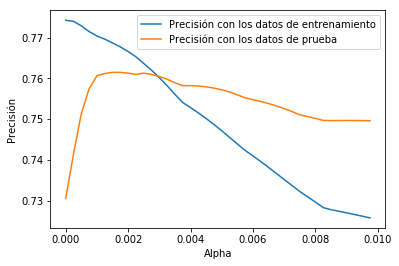

In [86]:
training_accuracy = []
test_accuracy = []

alpha_settings = np.arange(0,0.01,0.00025)
for alphaParam in alpha_settings:
    lasso = Lasso(alpha=alphaParam).fit(Xnormalized_train, y_train)
    a = lasso.score(Xnormalized_train, y_train)
    b = lasso.score(Xnormalized_test, y_test)
    
    training_accuracy.append(a)
    test_accuracy.append(b)

plt.plot(alpha_settings, training_accuracy, label="Precisión con los datos de entrenamiento")
plt.plot(alpha_settings, test_accuracy, label="Precisión con los datos de prueba")
plt.ylabel("Precisión")
plt.xlabel("Alpha")
plt.legend()

Como podemos observar obtenemos la máxima precisión con un valor de alpha de aproximadamente 0.001. Una vez mas podemos utilizar `GridSearch` para asegurarnos de que nuestra suposicion es correcta.

In [87]:
param_grid = {'alpha': [x for x in np.arange(0,0.01,0.00025)]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5,
                          return_train_score=True) 
grid_search.fit(Xnormalized_train, y_train)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.71
Mejor clasificador encontrado: {} Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Evaluación sobre el conjunto de test: 0.76


Y como podemos ver, el mejor clasificador es `Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)` cuya alpha es 0.001, luego nuestra suposición es correcta.

## Regresión logística
También podemos aplicar regresión logistica con el método `LogisticRegression` y al igual que en apartados anteriores ver la evolución de la precisión a medida que cambiamos el parámetro C con un pequeño script.

In [88]:
logreg = LogisticRegression().fit(Xnormalized_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(Xnormalized_test, y_test)))

Rendimiento sobre entrenamiento: 0.986
Rendimiento sobre el conjunto de prueba: 0.979


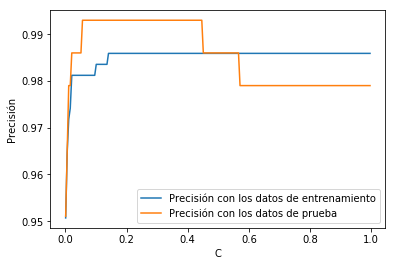

In [89]:
training_accuracy = []
test_accuracy = []

c_settings = np.arange(0.001,1,0.005)
for cparam in c_settings:
    logreg = LogisticRegression(C=cparam).fit(Xnormalized_train, y_train)
    a = logreg.score(Xnormalized_train, y_train)
    b = logreg.score(Xnormalized_test, y_test)
    training_accuracy.append(a)
    test_accuracy.append(b)
plt.plot(c_settings, training_accuracy, label="Precisión con los datos de entrenamiento")
plt.plot(c_settings, test_accuracy, label="Precisión con los datos de prueba")
plt.ylabel("Precisión")
plt.xlabel("C")
plt.legend()

Aproximadamente en 0.1 hemos obtenido el máximo en los datos de prueba. Para comprobarlo vamos a utilizar el algoritmo `GridSearchCV`

In [91]:
param_grid = {'C': [x for x in np.arange(0.001,1.0,0.005)]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5,
                          return_train_score=True) 
grid_search.fit(Xnormalized_train, y_train)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.98
Mejor clasificador encontrado: {} LogisticRegression(C=0.996, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Evaluación sobre el conjunto de test: 0.98


Tras aplicar el algoritmo podemos confirmar que el máximo se da con un valor de C de 0.996  
Podemos ver los resultados graficamente con una matriz de confusion

In [92]:
lr = LogisticRegression(C=0.1, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(Xnormalized_train, y_train)
prediccion = lr.predict(Xnormalized_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion,target_names=y_names))

Matriz de confusión:
[[53  1]
 [ 0 89]]
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        54
      benign       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Y podemos ver como los resultados son: TN=53, FP=1, FN=0, TP=89 y el clasificador tiene un f1-score del 99%

## Maquina de vectores soporte
Tambien es posible utilizar una SVM para clasificar las distintas clases de nuestro problema.  
En este caso utilizamos `LinearSVC` para obtener un clasificador y utilizamos un script para ver cual será el mejor valor para el parametro C

In [93]:
svc = LinearSVC().fit(Xnormalized_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(svc.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(svc.score(Xnormalized_test, y_test)))

Rendimiento sobre entrenamiento: 0.988
Rendimiento sobre el conjunto de prueba: 0.965


In [94]:
svc = LinearSVC(C=0.5).fit(Xnormalized_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(svc.score(Xnormalized_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(svc.score(Xnormalized_test, y_test)))

Rendimiento sobre entrenamiento: 0.991
Rendimiento sobre el conjunto de prueba: 0.972


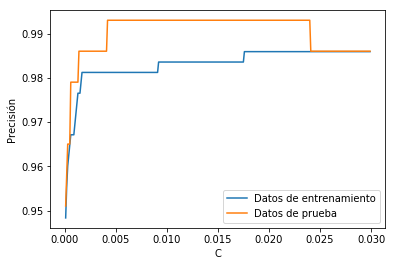

In [95]:
training_accuracy = []
test_accuracy = []

c_settings = np.arange(0.0001,0.03,0.0001)
for cparam in c_settings:
    svc = LinearSVC(C=cparam).fit(Xnormalized_train, y_train)
    a = svc.score(Xnormalized_train, y_train)
    b = svc.score(Xnormalized_test, y_test)
   
    training_accuracy.append(a)
    test_accuracy.append(b)
    
plt.plot(c_settings, training_accuracy, label="Datos de entrenamiento")
plt.plot(c_settings, test_accuracy, label="Datos de prueba")
plt.ylabel("Precisión")
plt.xlabel("C")
plt.legend()

Aproximadamente sobre 0.003 se obtiene la precisión maxima con los datos de prueba. Para comprobarlo podemos utilizar `GridSearch`

In [96]:
param_grid = {'C': [x for x in np.arange(0.0001,0.05,0.0001)]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5,
                          return_train_score=True) 
grid_search.fit(Xnormalized_train, y_train)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.98
Mejor clasificador encontrado: {} LinearSVC(C=0.0027, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Evaluación sobre el conjunto de test: 0.99


El mejor clasificador se da con C= 0.0027, aproximadamente 0.003. Podemos aplicarlo y ver la matriz de confusión que obtenemos.

In [97]:
mvs = LinearSVC(C=0.003, class_weight=None, dual=True, fit_intercept=True,intercept_scaling=1, loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='l2', random_state=None, tol=0.0001, verbose=0)
mvs.fit(Xnormalized_train, y_train)
prediccion = mvs.predict(Xnormalized_test)
print("Matriz de confusión:")
print(confusion_matrix(y_test, prediccion))
print(classification_report(y_test, prediccion,target_names=y_names))

Matriz de confusión:
[[53  1]
 [ 1 88]]
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        54
      benign       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Con un f1-score del 99%, nuestro modelo tiene TN=53, FP=1, FN=1, TP=88

## Red neuronal
Además, tambien podemos realizar una clasificación con redes neuronales utilizando `MLPClassifier`.  
Por ejemplo, podemos crear una red neuronal con 3 capas ocultas de 10 neuronas cada una.

In [101]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500)
mlp.fit(Xnormalized_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Una vez entrenada, podemos ver las predicciones que se obtienen sobre los datos de prueba y compararlos con los que se deberían de haber obtenido.

In [102]:
predicciones = mlp.predict(Xnormalized_test)

In [103]:
print("Matriz de confusión:")
print(confusion_matrix(y_test,predicciones))
print(classification_report(y_test,predicciones,target_names=y_names))

Matriz de confusión:
[[53  1]
 [ 2 87]]
              precision    recall  f1-score   support

   malignant       0.96      0.98      0.97        54
      benign       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Como podemos observar, hemos obtenido una precisión del 97% en el f1-score.

Una vez más, podemos utilizar el metodo `GridSearchCV` para realizar un ajuste de parámetros. 
En este caso nos creamos un diccionario con distintos valores de las capas internas y máximo de iteraciones.

In [113]:
param_grid = {'hidden_layer_sizes': [(1),(2),(5),(2,2),(5,5),(10,10,10)],
              'max_iter': [500, 750, 1000],
             }

In [114]:
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5,
                          return_train_score=True) 

In [115]:
grid_search.fit(Xnormalized_train, y_train)
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}".format(grid_search.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(Xnormalized_test, y_test)))

Mejor resultado (media) en validación cruzada: 0.98
Mejor clasificador encontrado: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Evaluación sobre el conjunto de test: 0.99


Una vez ejecutado, observamos como el mejor clasificador ha sido el siguiente:

`MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)`
              
Con una precisión del 99%.  
Si lo aplicamos podemos obtener la matriz de confusión de el mejor.

In [116]:
nn = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=750, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
nn.fit(Xnormalized_train, y_train)
predicts = nn.predict(Xnormalized_test)
print("Matriz de confusión:")

print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts,target_names=y_names))

Matriz de confusión:
[[53  1]
 [ 4 85]]
              precision    recall  f1-score   support

   malignant       0.93      0.98      0.95        54
      benign       0.99      0.96      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



Y como podemos ver, con un f1-score del 99%, nuestra red neuronal de 2 capas ocultas de 5 neuronas cada una es la mejor. Tiene 53 TP, 1 FP, 1 FN y 88 FN